<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

hA = a xA + b

hB = a xB + b

y = hA * hB

In [15]:
from keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = 2
b = 1

x_train_A = np.random.rand(1000, 1) * 2 - 1
x_train_B = np.random.rand(1000, 1) * 2 - 1
y_train = (a * x_train_A + b) * (a * x_train_B + b)

In [16]:
xA = layers.Input((1,), name='xA')
xB = layers.Input((1,), name='xB')

shared_layer = layers.Dense(1, name='shared')

sA = shared_layer(xA)
sB = shared_layer(xB)

y = layers.Multiply(name='mul')([sA, sB])

model = models.Model([xA, xB], y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xA (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
xB (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
shared (Dense)                  (None, 1)            2           xA[0][0]                         
                                                                 xB[0][0]                         
__________________________________________________________________________________________________
mul (Multiply)                  (None, 1)            0           shared[0][0]                     
          

In [17]:
model.compile('adam', 'mse')
hist = model.fit([x_train_A, x_train_B], y_train, batch_size=8, epochs=200, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/200
800/800 [==============================] - 0s 264us/step - loss: 5.3408 - val_loss: 3.8436
Epoch 2/200
800/800 [==============================] - 0s 76us/step - loss: 5.1271 - val_loss: 3.6316
Epoch 3/200
800/800 [==============================] - 0s 82us/step - loss: 4.7744 - val_loss: 3.3307
Epoch 4/200
800/800 [==============================] - 0s 80us/step - loss: 4.3001 - val_loss: 2.9294
Epoch 5/200
800/800 [==============================] - 0s 80us/step - loss: 3.7188 - val_loss: 2.4896
Epoch 6/200
800/800 [==============================] - 0s 103us/step - loss: 3.0956 - val_loss: 2.0442
Epoch 7/200
800/800 [==============================] - 0s 81us/step - loss: 2.4890 - val_loss: 1.6257
Epoch 8/200
800/800 [==============================] - 0s 81us/step - loss: 1.9374 - val_loss: 1.2699
Epoch 9/200
800/800 [==============================] - 0s 77us/step - loss: 1.4790 - val_loss: 0.9801
Epoch 10/200
800/800 [============

800/800 [==============================] - 0s 92us/step - loss: 4.3066e-12 - val_loss: 4.3558e-12
Epoch 77/200
800/800 [==============================] - 0s 77us/step - loss: 4.3066e-12 - val_loss: 4.3558e-12
Epoch 78/200
800/800 [==============================] - 0s 98us/step - loss: 4.3066e-12 - val_loss: 4.3558e-12
Epoch 79/200
800/800 [==============================] - 0s 83us/step - loss: 3.3759e-12 - val_loss: 3.1398e-12
Epoch 80/200
800/800 [==============================] - 0s 87us/step - loss: 2.5523e-12 - val_loss: 2.4972e-12
Epoch 81/200
800/800 [==============================] - 0s 86us/step - loss: 2.4634e-12 - val_loss: 2.4972e-12
Epoch 82/200
800/800 [==============================] - 0s 75us/step - loss: 2.4634e-12 - val_loss: 2.4972e-12
Epoch 83/200
800/800 [==============================] - 0s 87us/step - loss: 2.3929e-12 - val_loss: 2.0513e-12
Epoch 84/200
800/800 [==============================] - 0s 83us/step - loss: 2.1031e-12 - val_loss: 2.0513e-12
Epoch 85/200
8

800/800 [==============================] - 0s 78us/step - loss: 5.4907e-14 - val_loss: 1.8652e-14
Epoch 150/200
800/800 [==============================] - 0s 86us/step - loss: 4.7359e-14 - val_loss: 1.8652e-14
Epoch 151/200
800/800 [==============================] - 0s 74us/step - loss: 1.4807e-12 - val_loss: 3.3078e-12
Epoch 152/200
800/800 [==============================] - 0s 74us/step - loss: 3.8069e-12 - val_loss: 2.4876e-12
Epoch 153/200
800/800 [==============================] - 0s 72us/step - loss: 7.0019e-13 - val_loss: 3.2797e-13
Epoch 154/200
800/800 [==============================] - 0s 75us/step - loss: 1.1449e-11 - val_loss: 2.8351e-12
Epoch 155/200
800/800 [==============================] - 0s 76us/step - loss: 1.8175e-12 - val_loss: 5.5968e-13
Epoch 156/200
800/800 [==============================] - 0s 72us/step - loss: 3.0247e-13 - val_loss: 1.8652e-14
Epoch 157/200
800/800 [==============================] - 0s 76us/step - loss: 3.1190e-13 - val_loss: 1.5319e-13
Epoch 

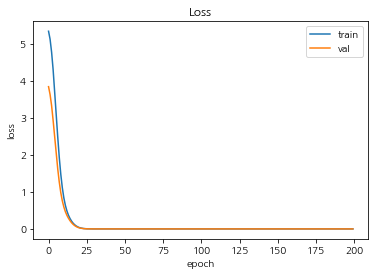

In [18]:
plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

In [19]:
shared_weights = model.get_layer('shared').get_weights()
print('shared_weights\n', shared_weights, '\n')

shared_weights
 [array([[1.9999987]], dtype=float32), array([1.0000005], dtype=float32)] 

